In [1]:
#import geopandas as gp
import pandas as pd
import os
import json
import urllib2
from zipfile import ZipFile
from StringIO import StringIO
import pylab as pl
%pylab inline

urlStyle = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json")
jStyle = json.load(urlStyle)
pl.rcParams.update(jStyle)

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


I am using geopanda. that is **not required** for this particular exercise, but geopand works with geospacial data: the shape files that we get from pluto for example.

PLEASE REMEMBER: seed your random functions if you need to use any, label your axes clearly, comment your code, use PEP8!


##We will use 2 different datasets.
##an interesting urban question is "can we measure and predict energy use based on observables that are easier to be acquired". for example the urban observatory at CUSP can monitor lights: they are a realtively easy observable. All you need is a camera, and a pipeline to process your data. But how does the light coming from a window relate to the total energy consumption? We generally postulate that light is a proxy for occupancy, and that occupancy is a good predictor of energy consumption.
##so let's test if the last link holds. If we have data on the energy consumed by a __building__ how well does that relate to the number of units in the building?

## data on energy consumption can be found here for the city of NY https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z  

In [2]:
nrgURL = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD'
openNrg = urllib2.urlopen(nrgURL)
nrg = pd.read_csv(openNrg)
print nrg.columns

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status', u'BBLs Co-reported', u'Reported NYC Building Identificaiton Numbers (BINs)', u'Street Number', u'Street Name', u'Borough', u'Zip Code', u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)', u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)', u'Weather Normalized Source EUI(kBtu/ft2)', u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)', u'Automatic Water Benchmarking Eligible', u'Reported Water Method', u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)', u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)', u'Reported Property Floor Area (Building(s)) (ft²)', u'DOF Property Floor Area (Buildngs and Parking)(ft2)', u'Primary Property Type - Self Selected', u'DOF Number of Buildings'], dtype='object')


In [2]:
#nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
#print nrg.columns


Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


#however this datasets does not have the number of units. We can find that in the Pluto dataset.
reading in the Pluto data for manhattan, which will give me the number of units ber building   Manhattan/MNMapPLUTO.shp

In [3]:
#it would be great to be able to use download/ unzip Manhattan MapPLUTO directly
#from Bytes of the Big Apple by using something like the below. I can't figure it
#out. 

#urlPLUTO = 'http://www.nyc.gov/html/dcp/download/bytes/mn_mappluto_15v1.zip'
#rPLUTO = urllib2.urlopen(urlPLUTO).read()
#fPLUTO = ZipFile(StringIO(rPLUTO))
#dfmnPLUTO = gp.GeoDataFrame.from_file(fPLUTO)


#creating dataframe from hosted csv (in my public Dropbox folder)
urlPLUTO = 'https://dl.dropboxusercontent.com/u/58178372/MNpluto.csv'
openPLUTO = urllib2.urlopen(urlPLUTO)
dfPLUTO = pd.read_csv(openPLUTO)
print dfPLUTO.columns

Index([u'FID', u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010', u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct', u'HealthArea', u'Address', u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1', u'Overlay2', u'SPDist1', u'SPDist2', u'LtdHeight', u'AllZoning1', u'AllZoning2', u'SplitZone', u'BldgClass', u'LandUse', u'Easements', u'OwnerType', u'OwnerName', u'LotArea', u'BldgArea', u'ComArea', u'ResArea', u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea', u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors', u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront', u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType', u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot', u'YearBuilt', u'BuiltCode', u'YearAlter1', u'YearAlter2', u'HistDist', u'Landmark', u'BuiltFAR', u'ResidFAR', u'CommFAR', u'FacilFAR', u'BoroCode', u'BBL', u'CondoNo', u'Tract2010', u'XCoord', u'YCoord', u'ZoneMap', u'ZM

In [6]:
#print dfPLUTO.BBL.astype(float)

0     1002760020
1     1002280022
2     1005900056
3     1005890030
4     1005310056
5     1011860040
6     1004940026
7     1005580017
8     1001807505
9     1005820050
10    1004680049
11    1008090073
12    1002040034
13    1002270019
14    1001367504
...
42771    1017800075
42772    1003010011
42773    1016527501
42774    1004930030
42775    1010370038
42776    1006240008
42777    1010170004
42778    1010370030
42779    1007020125
42780    1013730001
42781    1013730030
42782    1018447501
42783    1020957501
42784    1020677501
42785    1014737504
Name: BBL, Length: 42786, dtype: float64


in pandas scatter_matrix will plot each column agains each other. that is a great way to begin inspecting your data (though be careful cause it is computationally comsuming for large datasets) 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000144EB630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000110B5748>]], dtype=object)

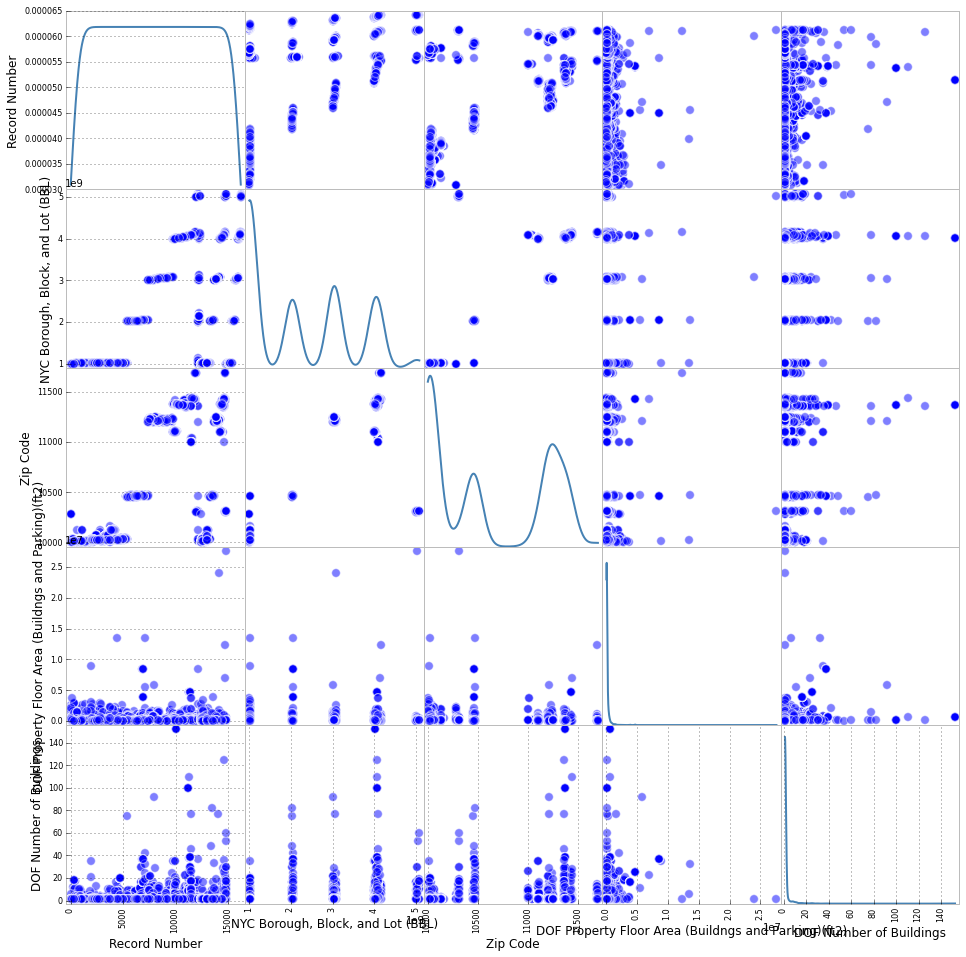

In [4]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

it will show me correlations between variables, but it will also show me what can and 
cannot be plotted trivially in my dataset! here only a few columns can be plotted: 
those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. 
The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg.       u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: i need to remove all values that cannot conver to float in order to use the columns and convert them to float arrays and do math with them. 

Below I created a function that returns True if what is passed as argument can be converted to a float, and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into.  
this has to be done entry by entry: if you gve t a series you get error "cannot convert the series to <type 'float'>"

However you can pass it a whole array by using it in conjunction with
np.vectorize (look up the syntax!) which will implement a for loop for you under the hood to pass the series entry by entry to your function.


In [5]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

floats = np.vectorize(canconvert)

Now for every column i care about i can create an array, call it for eg. indx, of True and False (a Boolean array) that i can use as an index to pick entries that 
I want to use from my arrays of interest. I can replace the entries that failed to be converted to 'NaN'

(because my function return Trues when I can convert and False otherwise i actuallly want the complementary array: ~indx)

In [6]:
#create the indices array here
idxEnergy = floats(nrg['Site EUI(kBtu/ft2)'])
idxArea = floats(nrg['Reported Property Floor Area (Building(s)) (ft²)'])
#idxUnits = floats(dfPLUTO['UnitsRes'])

In [7]:
print 'Energy =', idxEnergy[0:100]
print 'Area =', idxArea[0:100]

Energy = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Area = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  T

In [24]:
#nrgCsv['Site EUI(kBtu/ft2)']= float('NaN')
#nrgCsv['Site EUI(kBtu/ft2)'][~index] = float('NaN')
#nrgnoNA = nrgCsv['Site EUI(kBtu/ft2)'][~index]
##etc etc... for all columns you care about


In [8]:
nrg['Site EUI(kBtu/ft2)'][~idxEnergy] = float('NaN')
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~idxArea] = float('NaN')

#nrg['Site EUI(kBtu/ft2)'] = float('NaN')
#nrg['Site EUI(kBtu/ft2)'][idxEnergy] = nrg['Site EUI(kBtu/ft2)'].astype(float)
#nrg['Site EUI(kBtu/ft2)'][~idxEnergy] = float('NaN')
#nrg['Reported Property Floor Area (Building(s)) (ft²)'][idxArea] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
#nrg['Reported Property Floor Area (Building(s)) (ft²)'][~idxArea] = float('NaN')

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [9]:
##check that your conversion worked: e.g.
#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!

print nrg['Site EUI(kBtu/ft2)'].astype(float)
print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
print dfPLUTO.BBL.astype(float)
print dfPLUTO.UnitsTotal.astype(float)

0       180.5
1        82.1
2       137.7
3       103.2
4        74.0
5        36.4
6       114.8
7       130.0
8       138.3
9     56909.0
10       88.2
11       15.7
12        NaN
13       85.7
14      195.7
...
16155   NaN
16156   NaN
16157   NaN
16158   NaN
16159   NaN
16160   NaN
16161   NaN
16162   NaN
16163   NaN
16164   NaN
16165   NaN
16166   NaN
16167   NaN
16168   NaN
16169   NaN
Name: Site EUI(kBtu/ft2), Length: 16170, dtype: float64
0      91968
1     235370
2      64806
3      62839
4      98000
5      53275
6      61846
7     204417
8      60110
9     457946
10    511001
11     56442
12     60939
13     78435
14     80293
...
16155   NaN
16156   NaN
16157   NaN
16158   NaN
16159   NaN
16160   NaN
16161   NaN
16162   NaN
16163   NaN
16164   NaN
16165   NaN
16166   NaN
16167   NaN
16168   NaN
16169   NaN
Name: Reported Property Floor Area (Building(s)) (ft²), Length: 16170, dtype: float64
0     1002760020
1     1002280022
2     1005900056
3     1005890030
4     1005310056


#TO MERGE THE DATASET WE NEED A COMMON COLUMN
here is where you want to merge the datasets. You need a common column: the building id BBL
However the name of this variable (column) in the Energy dataset is     'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!) 

In [9]:
#nrg['BBL'] = ...
#bblnrgdata = pd.merge(.....)
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)'].astype(float)
nrgPLUTOmerge = pd.merge(nrg, dfPLUTO, on='BBL')
print nrgPLUTOmerge.columns

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status', u'BBLs Co-reported', u'Reported NYC Building Identificaiton Numbers (BINs)', u'Street Number', u'Street Name', u'Borough_x', u'Zip Code', u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)', u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)', u'Weather Normalized Source EUI(kBtu/ft2)', u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)', u'Automatic Water Benchmarking Eligible', u'Reported Water Method', u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)', u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)', u'Reported Property Floor Area (Building(s)) (ft²)', u'DOF Property Floor Area (Buildngs and Parking)(ft2)', u'Primary Property Type - Self Selected', u'DOF Number of Buildings', u'BBL', u'FID', u'Borough_y', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010', u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct', u'HealthArea', u'A

once you have the dataframe with all the info you want, you want to plot 
Energy vs Number of Units in the Building. 
Remember: Energy TOTAL, not per sq ft...
Here you can choose what you think makes more sense for the number of units: all units, residential units...
make a 'natural' scale scatter plot first it will look really bad cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000.
perhaps zoom into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

###Selecting 'UnitsTotal', which I believe is more relevant for this study since it encompasses more units than only those that are residential.

In [13]:
#Total energy
nrgPLUTOmerge['TotEnergy'] = nrgPLUTOmerge['Site EUI(kBtu/ft2)'].astype(float) \
* nrgPLUTOmerge['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
print nrgPLUTOmerge['TotEnergy']


0     19323877.0
1      6484984.8
2      8313213.0
3            NaN
4      6721879.5
5     15713340.1
6      8304709.0
7     76110738.0
8      1715440.4
9            NaN
10     3643200.0
11    42357120.0
12     8150267.0
13    43236706.5
14    13681370.0
...
2766   NaN
2767   NaN
2768   NaN
2769   NaN
2770   NaN
2771   NaN
2772   NaN
2773   NaN
2774   NaN
2775   NaN
2776   NaN
2777   NaN
2778   NaN
2779   NaN
2780   NaN
Name: TotEnergy, Length: 2781, dtype: float64


In [22]:
mergeCut = nrgPLUTOmerge.dropna(subset=['Site EUI(kBtu/ft2)','UnitsTotal','BBL', 
                                        'Reported Property Floor Area (Building(s)) (ft²)', 'TotEnergy']).copy()
print mergeCut

      Record Number  NYC Borough, Block, and Lot (BBL) Co-reported BBL Status  \
0               500                         1005050001                    NaN   
1              5116                         1021750080                    NaN   
2              1544                         1008580014                    NaN   
4              2537                         1012120110                    NaN   
5              2841                         1012747502                    NaN   
6              2945                         1012920048                    NaN   
7             15120                         1013040033                    NaN   
8              5210                         1021800486                    NaN   
10            15025                         1010560001                    NaN   
11             4208                         1016240033                    NaN   
12             4799                         1020427502                    NaN   
13             2180         

when the points in a plot all look scrunched against the axis try a log plot! in pandas you enable that with the keyword 'loglog' :
bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data i had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array:
something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

also i removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however  they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.


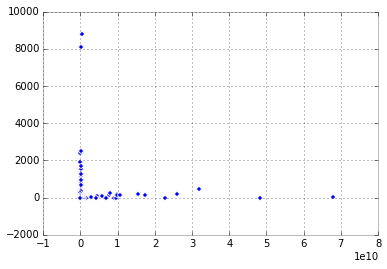

In [41]:
nrgbyUnits = pl.scatter(nrgPLUTOmerge['TotEnergy'], nrgPLUTOmerge['UnitsTotal'])

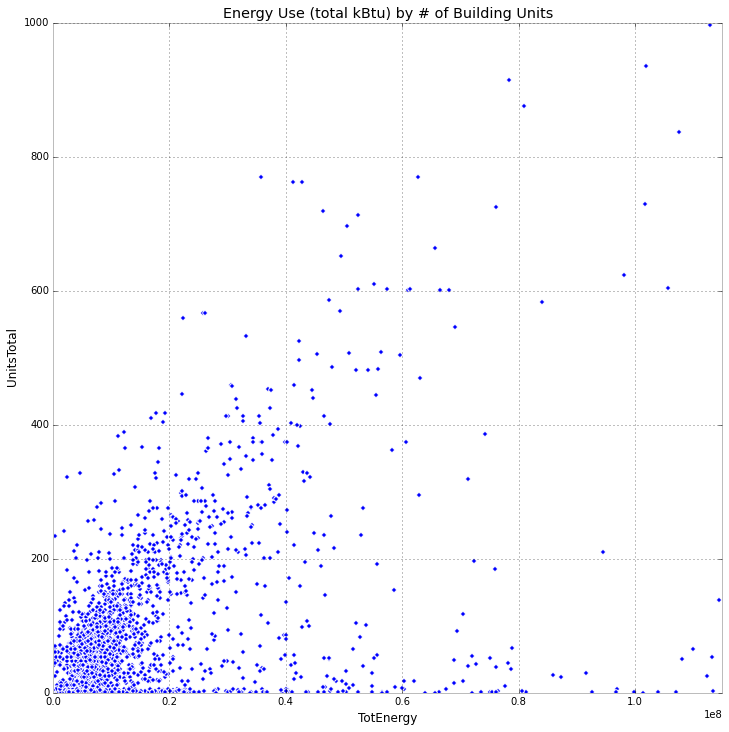

In [40]:
nrgPLUTOmerge.plot(kind='scatter', x="TotEnergy", y="UnitsTotal", figsize=(12,12), xlim=(1000,1.15e8), 
                   ylim=(0,1000), title='Energy Use (total kBtu) by # of Building Units')

In [43]:
nrgPLUTOcut = nrgPLUTOmerge[(nrgPLUTOmerge.TotEnergy > 1000) 
                            & (nrgPLUTOmerge.TotEnergy < 1e9) & (nrgPLUTOmerge.UnitsTotal > 0) 
                            & (nrgPLUTOmerge.UnitsTotal<1200)]

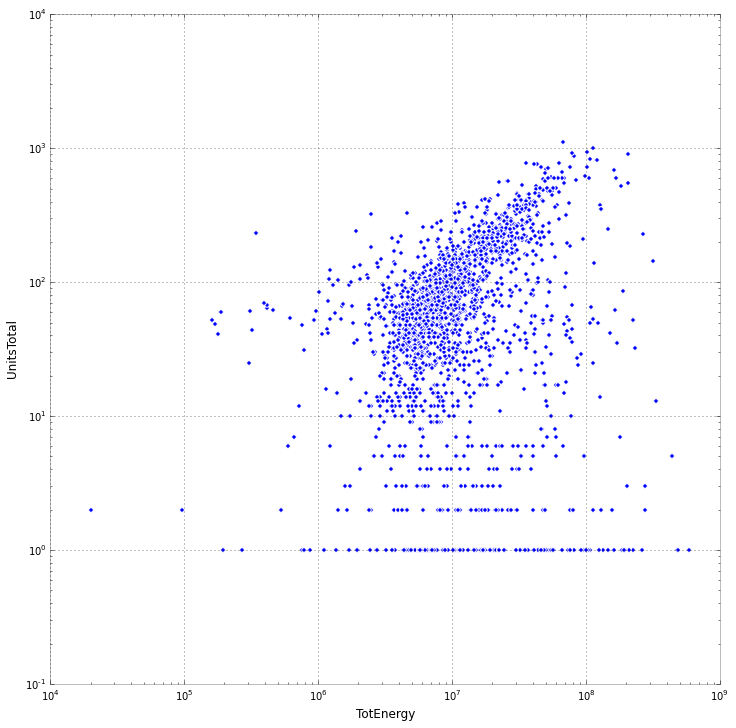

In [44]:
nrgPLUTOcut.plot(kind='scatter',x='TotEnergy',y='UnitsTotal', figsize=(12, 12), loglog=True)

Now fit a line through the data. you can use whatever you want to do it: 
statsmodels, scipy, any other package, or write your own minimization of the residuals
## BUT REMEMBER: we see hints of a lienar relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:

if you used statsmodels it would look something like this:

###Energy vs Units

In [53]:
import statsmodels.api as sm
logunits = np.log10(nrgPLUTOcut.UnitsTotal)
lognrg = np.log10(nrgPLUTOcut.TotEnergy)

#X = sm.add_constant(np.log10(nrgPLUTOcut.UnitsTotal))
X = sm.add_constant(logunits)
#print X
model = sm.OLS(np.log10(nrgPLUTOcut.TotEnergy), X, missing='drop') #.fit() # ignores entires where x or y is NaN
fit = model.fit()
#return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse

remember to choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which  variable has a 'sensible' distribution that allows you to fit a function to it: 
    you need your independent variable to span a large range, and to be spread somewhat evenly in the range, 
    rather than just clustered in a spot
    


                            OLS Regression Results                            
Dep. Variable:              TotEnergy   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     49.95
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           2.14e-12
Time:                        12:02:42   Log-Likelihood:                -1233.4
No. Observations:                2110   AIC:                             2471.
Df Residuals:                    2108   BIC:                             2482.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.8702      0.025    275.788      0.0

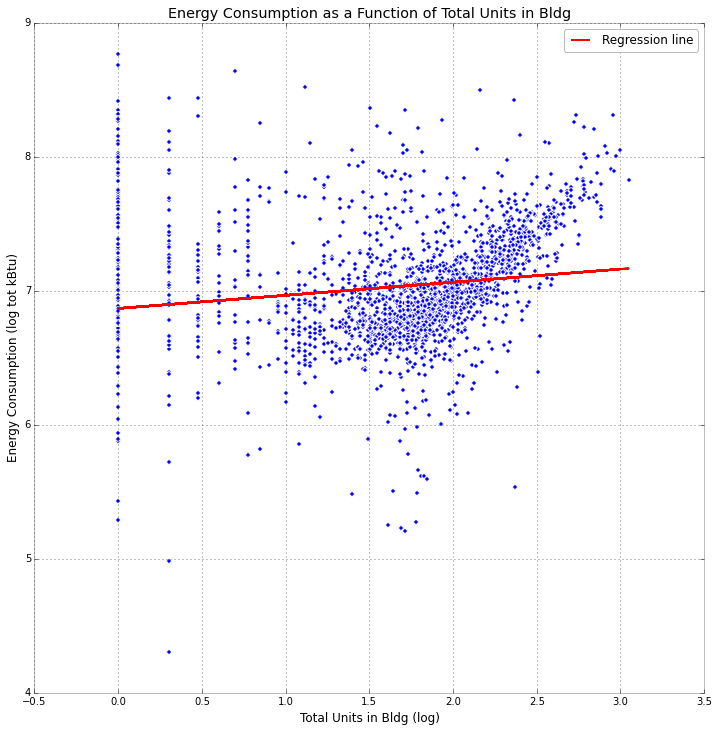

In [66]:
#fit and plots here
print fit.summary()

pl.figure(figsize = (12,12))
pl.scatter(logunits, lognrg)
pl.xlabel('Total Units in Bldg (log)')
pl.ylabel('Energy Consumption (log tot kBtu)')
pl.title('Energy Consumption as a Function of Total Units in Bldg')
plot(logunits, fit.predict(), 'r', linewidth = 2, label = 'Regression line')
pl.legend()


###Units vs Energy

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     49.95
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           2.14e-12
Time:                        12:02:08   Log-Likelihood:                -2163.6
No. Observations:                2110   AIC:                             4331.
Df Residuals:                    2108   BIC:                             4342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0009      0.236      0.004      0.9

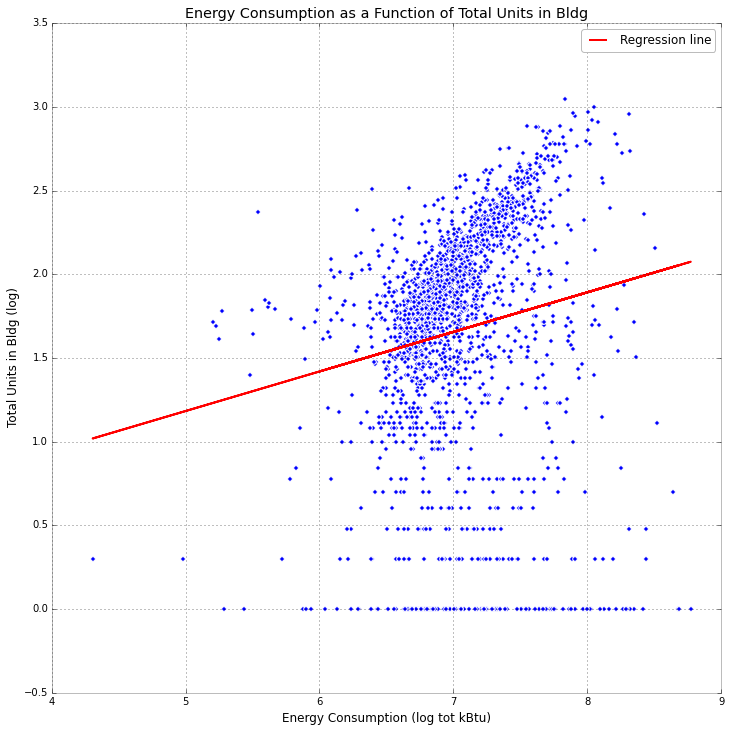

In [65]:
X1 = sm.add_constant(np.log10(nrgPLUTOcut.TotEnergy))
#print X
model1 = sm.OLS(np.log10(nrgPLUTOcut.UnitsTotal), X1, missing='drop') #.fit() # ignores entires where x or y is NaN
fit1 = model1.fit()
print fit1.summary()

pl.figure(figsize = (12,12))
pl.scatter(lognrg, logunits)
pl.xlabel('Energy Consumption (log tot kBtu)')
pl.ylabel('Total Units in Bldg (log)')
pl.title('Energy Consumption as a Function of Total Units in Bldg')
plot(lognrg, fit1.predict(), 'r', label = 'Regression line')
pl.legend()

try making a fit for energy vs units AND a fit for units vs energy. 
tell me which is better. 

##look at the fit summary: which is better? could you do a likelihood ratio test here? why or why not??

###A liklihood ratio test wouldn't make sense here since the same interaction is being measured with the same tool (same linear regression with same number of degrees of freedom). Both models have the data fitted equally as good (or bad), i.e. the same R^2.

##now fit a second degree curve to it: a*x^2+b*x+c. 
that is still called a linear fir by the way, the "linear" definition refers to the PARAMETERS being linear, not to the variable!
you can use np.polyfit for example (an example showned in the other assignment notebook), with order 2 instead of 1,

np.polyfit(x, y, 2)

or statmodels.formula.api passing a formula like 

formula = 'y ~ 1 + x + I(x ^ 2.0)'

##look at the fit summary: which is better? could you do a likelihood ratio test here? why or why not??

In [88]:
#now fit a second degree curve to it: ax^2+bx+c.

import statsmodels.formula.api as smf

#least squares polynomial fit w 2 degrees of freedom
a, b, c = np.polyfit(logunits, lognrg, 2)
print a, b, c

#ax^2+bx+c:
x = np.arange(0,4)
x1 = np.arange(0,10)
curve = a*x**2 + b*x + c
curve1 = a*x1**2 + b*x1 + c

0.33516712833 -0.78609199418 7.25700202544


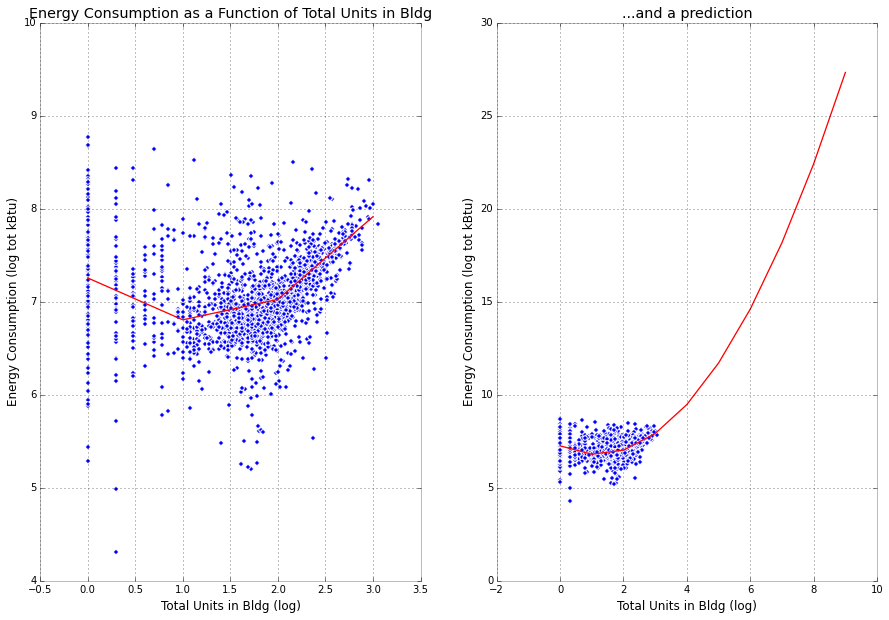

In [96]:
fig = pl.figure(figsize = (15,10))
fig.add_subplot(121)
pl.scatter(logunits, lognrg)
pl.plot(x, curve, 'r', linewidth = 1.3)
pl.xlabel('Total Units in Bldg (log)')
pl.ylabel('Energy Consumption (log tot kBtu)')
pl.title('Energy Consumption as a Function of Total Units in Bldg')

fig.add_subplot(122)
pl.scatter(logunits, lognrg)
pl.plot(x1, curve1, 'r', linewidth = 1.3)
pl.xlabel('Total Units in Bldg (log)')
pl.ylabel('Energy Consumption (log tot kBtu)')
pl.title('...and a prediction')

**With two degrees of freedom, the zeros in the data exert less leverage on the fit than they do for a simple regression line with one degree of freedom.**

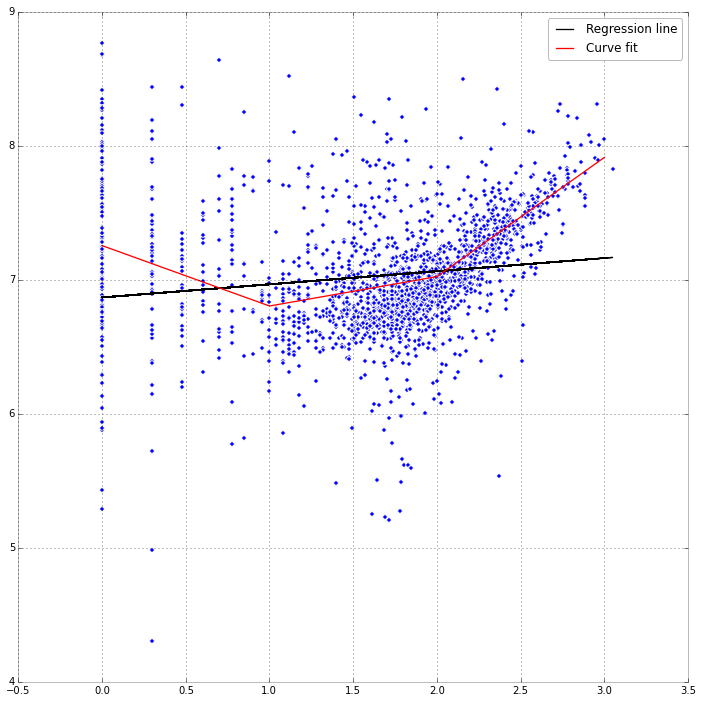

In [100]:
pl.figure(figsize = (12,12))
pl.scatter(logunits, lognrg)
pl.plot(logunits, fit.predict(), 'k', linewidth = 1.3, label = 'Regression line')
pl.plot(x, curve, 'r', linewidth = 1.3, label = 'Curve fit')
pl.legend()

**Seems clear that curve model is best, but will conduct OLS to be sure.**

In [104]:
nrgPLUTOcut['logUnits'] = nrgPLUTOcut['UnitsTotal'].apply(log10)
nrgPLUTOcut['logNrg'] = nrgPLUTOcut['TotEnergy'].apply(log10)

modelb = smf.ols(formula='lognrg ~ logunits + I(logunits**2)', data = nrgPLUTOcut)
fitb = modelb.fit()
fitb.summary()

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lognrg   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     294.1
Date:                Wed, 14 Oct 2015   Prob (F-statistic):          2.22e-113
Time:                        14:11:37   Log-Likelihood:                -998.35
No. Observations:                2110   AIC:                             2003.
Df Residuals:                    2107   BIC:                             2020.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            7.2570      0.028    259.612      0.000         7.202     7.312
logunits            -0.7861      0.040    -19.413      0.000        -0.866    -0.707
I(logunits ** 2)     0.3352      0.015     22.931      0.000         0.307     0.364
==============================================================================
Omnibus:                      234.571   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2095.984
Skew:                          -0.007   Prob(JB):                         0.00
Kurtosis:                       7.883   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R^2 is higher here, which means that the curve explains more of the variability around the mean than does the straight line. The difference in R^2 values also indicates that a liklihood ratio test could be used here.**

In [103]:
#Why did I do this?
#logunits = np.log10(nrgPLUTOcut.UnitsTotal)
#lognrg = np.log10(nrgPLUTOcut.TotEnergy)

modelc = sm.OLS(logunits, lognrg, missing='drop') #.fit() # ignores entires where x or y is NaN
fitc = modelc.fit()
print fitc.summary()

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Wed, 14 Oct 2015   Prob (F-statistic):               0.00
Time:                        14:05:56   Log-Likelihood:                -2163.6
No. Observations:                2110   AIC:                             4329.
Df Residuals:                    2109   BIC:                             4335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
TotEnergy      0.2366      0.002    113.470      0.0

EXTRA CREDIT: 
    
use WLS the weighted sq fit instead of OLS. you need to give weights to your points: 
estimates of the errors. the easiest thing is the sqrt of the datapoint value.
if you want to be more sophisticated you can estimate the variance of your data
near each point and use that 

Lastly: do it by hand and create a function that minimizes the residuals: 
       
the residuals are the sum of the differences between data and model: 
in the case of a line fit model (and you can use your errors if you did the extra credit!)

sum(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2

where a and b are the parameters returned by the line fitter. 
for each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope

write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


for i,a in enumerate(A):

    for j,b in enumerate(B):
    
         Lsurface[i][j].....

this gives you a 2D array that represents your likelihood surface! what we do to find a good fit is find the minimum (lowest point) on this surface. 

you can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap"

but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface))
and see if it helps!
also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. do that with the keyword extent: 
pl.imshow(Lsurface, .... , extent = [minimum, and max of your y array, minimum, and max of your x array]...) (notice that the numbers are switched! make sure to verify which axis is the slope, which is the intercept)

In [23]:
##create the array
##[...]
##pl.figure(figsize=(10,10))
##pl.title ("log likelihood surface", fontsize = 22)
##pl.imshow(np.log(Lsurface), extent = ..., aspect=...)
##[...]
##pl.colorbar()

EXTRA CREDIT: get creative with the dataset! can you make an insigntful plot to show any structure in the data?
    
below is my silly attempt at that




/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


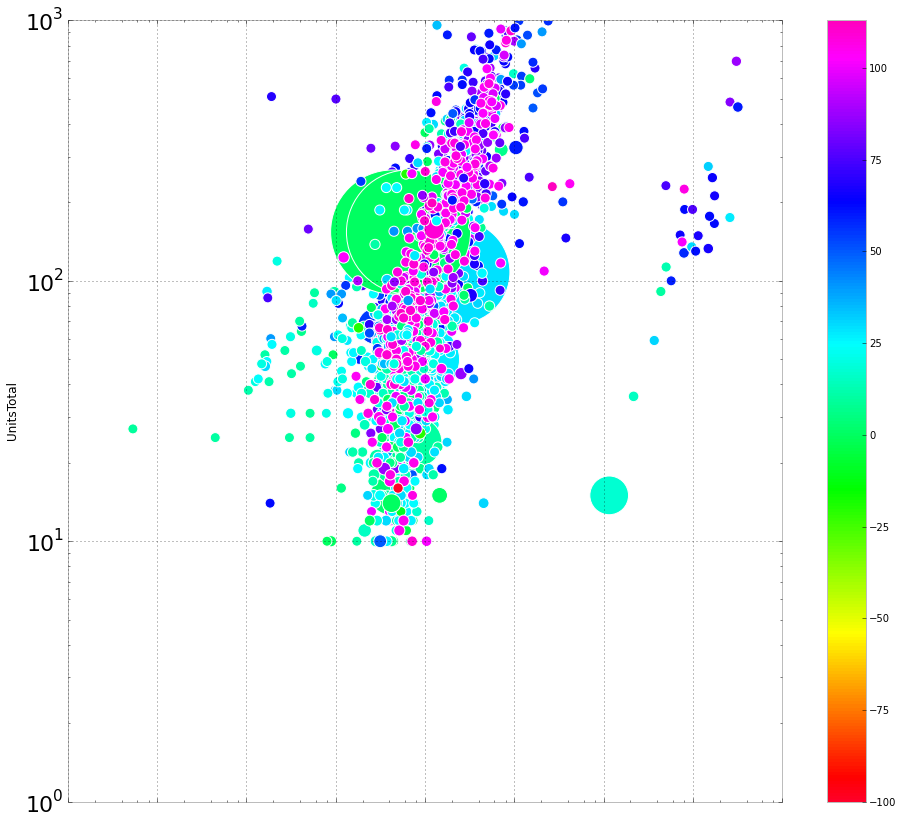

In [27]:
bblnrgdatacut['YearBuilt'][bblnrgdatacut['YearBuilt']<1800]=1800

bblnrgdatacut.plot(kind='scatter',x='nrg',y='UnitsTotal', fontsize=22, colormap='gist_rainbow', alpha = 1, marker='o',  figsize=(16, 14), loglog=True,  xlim=(1000,1e11), ylim=(1,1000), c=bblnrgdatacut['YearBuilt']-1900, s=bblnrgdatacut['UnitsTotal']/bblnrgdatacut['UnitsRes']*100)